In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [ ]:
!pip install chardet

In [ ]:
import chardet

In [ ]:
with open("book.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]

In [ ]:
book = pd.read_csv("book.csv", encoding=encoding)
book.head()

,Unnamed: 0,User_ID,Book_Title,Book_Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [ ]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User_ID      10000 non-null  int64 
 2   Book_Title   10000 non-null  object
 3   Book_Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [ ]:
len(book['User_ID'].unique())

2182

In [ ]:
book.shape

(10000, 4)

In [ ]:
len(book['Book_Title'].unique())

9659

In [ ]:
book_df =book.pivot_table(index='User_ID',
                                 columns='Book_Title',
                                 values='Book_Rating').reset_index(drop=True)
book_df.head()

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
book_df.fillna(0, inplace=True)
book_df

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
C = book['Book_Rating'].mean()
print(C)

7.5663


In [ ]:
m = book['Book_Rating'].quantile(0.90)
print(m)

10.0


In [ ]:
q_Books = book.copy().loc[book['Book_Rating'] >= m]
q_Books.shape

(1732, 4)

In [ ]:
uc_sim = 1 - pairwise_distances( book_df.values,metric='cosine')
uc_sim.shape

(2182, 2182)

In [ ]:
uc_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
uc_sim[1]

array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
uc_sim_df = pd.DataFrame(uc_sim)
uc_sim_df.index = book.User_ID.unique()
uc_sim_df.columns = book.User_ID.unique()

In [ ]:
uc_sim_df.shape

(2182, 2182)

In [ ]:
uc_sim_df.iloc[0:10, 0:10]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
276748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
u=book[(book['User_ID']==276726) | (book['User_ID']==17)]
u

,Unnamed: 0,User_ID,Book_Title,Book_Rating
0,1,276726,Classical Mythology,5
2413,2414,17,Conversations With Dogbert: A Dilbert Book,7
2414,2415,17,The Dilbert Bunch: A Dilbert Book (Main Street...,5
2415,2416,17,You Don't Need Experience if You've Got Attitude,6
2416,2417,17,"The Boss: Nameless, Blameless and Shameless (A...",3


In [ ]:
user_1=book[(book['User_ID']==276726)]
user_1

,Unnamed: 0,User_ID,Book_Title,Book_Rating
0,1,276726,Classical Mythology,5


In [ ]:
user_2=book[(book['User_ID']==17)]
user_2

,Unnamed: 0,User_ID,Book_Title,Book_Rating
2413,2414,17,Conversations With Dogbert: A Dilbert Book,7
2414,2415,17,The Dilbert Bunch: A Dilbert Book (Main Street...,5
2415,2416,17,You Don't Need Experience if You've Got Attitude,6
2416,2417,17,"The Boss: Nameless, Blameless and Shameless (A...",3


In [ ]:
indices = pd.Series(book.index, index=book['Book_Title']).drop_duplicates()

In [ ]:
indices[:10]

Book_Title
Classical Mythology                                                                                   0
Clara Callan                                                                                          1
Decision in Normandy                                                                                  2
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It    3
The Mummies of Urumchi                                                                                4
The Kitchen God's Wife                                                                                5
What If?: The World's Foremost Military Historians Imagine What Might Have Been                       6
PLEADING GUILTY                                                                                       7
Under the Black Flag: The Romance and the Reality of Life Among the Pirates                           8
Where You'll Find Me: And Other Stories              

In [ ]:
def get_recommendations(Book_Title, cosine_sim=uc_sim):

    idx = indices[Book_Title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[0:11]

    books_indices = [i[0] for i in sim_scores]

    return book['Book_Title'].iloc[books_indices]

In [ ]:
a=get_recommendations('Under the Black Flag: The Romance and the Reality of Life Among the Pirates')
a

8     Under the Black Flag: The Romance and the Real...
0                                   Classical Mythology
1                                          Clara Callan
2                                  Decision in Normandy
3     Flu: The Story of the Great Influenza Pandemic...
4                                The Mummies of Urumchi
5                                The Kitchen God's Wife
6     What If?: The World's Foremost Military Histor...
7                                       PLEADING GUILTY
9               Where You'll Find Me: And Other Stories
10                          Nights Below Station Street
Name: Book_Title, dtype: object

In [ ]:
b=get_recommendations('Classical Mythology')
b

0                                   Classical Mythology
1                                          Clara Callan
2                                  Decision in Normandy
3     Flu: The Story of the Great Influenza Pandemic...
4                                The Mummies of Urumchi
5                                The Kitchen God's Wife
6     What If?: The World's Foremost Military Histor...
7                                       PLEADING GUILTY
8     Under the Black Flag: The Romance and the Real...
9               Where You'll Find Me: And Other Stories
10                          Nights Below Station Street
Name: Book_Title, dtype: object

In [ ]:
pd.merge(user_1,user_2,on='Book_Rating',how='outer')

,Unnamed: 0_x,User_ID_x,Book_Title_x,Book_Rating,Unnamed: 0_y,User_ID_y,Book_Title_y
0,1.0,276726.0,Classical Mythology,5,2415,17,The Dilbert Bunch: A Dilbert Book (Main Street...
1,NaN,NaN,NaN,7,2414,17,Conversations With Dogbert: A Dilbert Book
2,NaN,NaN,NaN,6,2416,17,You Don't Need Experience if You've Got Attitude
3,NaN,NaN,NaN,3,2417,17,"The Boss: Nameless, Blameless and Shameless (A..."


In [ ]:
book_user_rating = book_df["You Don't Need Experience if You've Got Attitude"]

In [ ]:
book_user_rating

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2177    0.0
2178    0.0
2179    0.0
2180    0.0
2181    0.0
Name: You Don't Need Experience if You've Got Attitude, Length: 2182, dtype: float64

In [ ]:
similar_to_book = book_df.corrwith(book_user_rating)

In [ ]:
corr_book = pd.DataFrame(similar_to_book, columns=['Correlation'])
corr_book.dropna(inplace=True)
corr_book.head()

,Correlation
Book_Title,
"Jason, Madison &amp",-0.000459
Other Stories;Merril;1985;McClelland &amp,-0.000459
Repairing PC Drives &amp,-0.000459
'48,-0.000459
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000459


In [ ]:
corr_book[corr_book['Correlation'] > 0].sort_values(by='Correlation', ascending=False).head(10)

,Correlation
Book_Title,
Conversations With Dogbert: A Dilbert Book,1.0
"The Boss: Nameless, Blameless and Shameless (Adams, Scott, Dilbert Book,)",1.0
The Dilbert Bunch: A Dilbert Book (Main Street Editions),1.0
You Don't Need Experience if You've Got Attitude,1.0


In [ ]:
ratings_mean_count = pd.DataFrame(book.groupby('Book_Title')['Book_Rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(book.groupby('Book_Title')['Book_Rating'].count())

<Axes: >

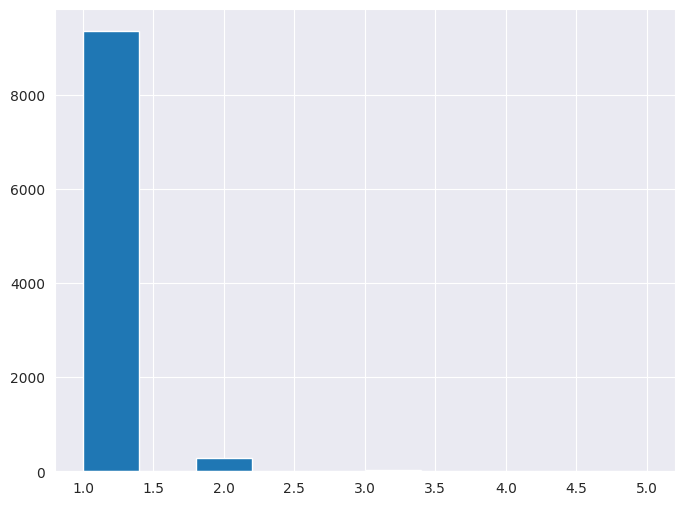

In [ ]:
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=10)

<Axes: >

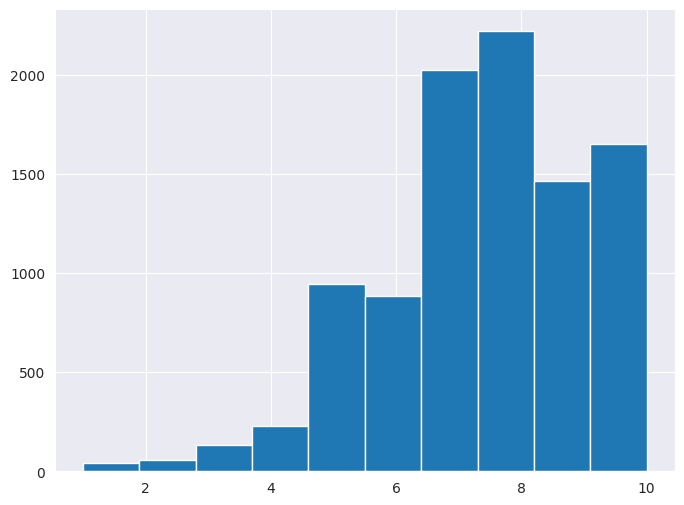

In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Book_Rating'].hist(bins=10)

<Figure size 800x600 with 0 Axes>

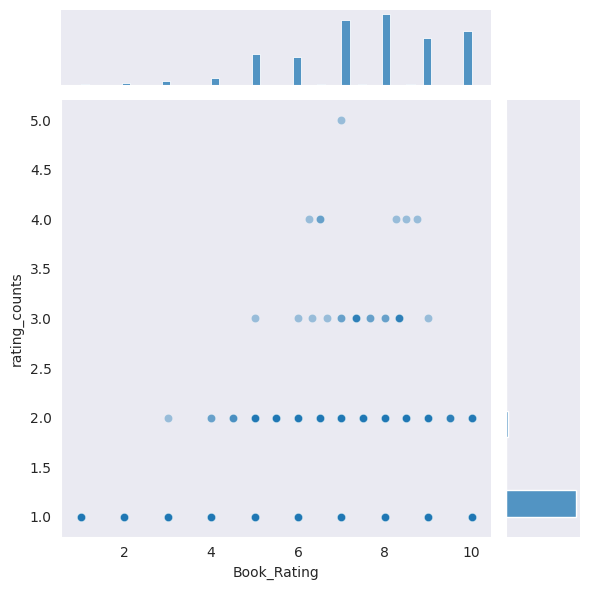

In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Book_Rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

#Conclusion:-
From the output, it is evident that the Books that have high correlation are not very well known.
This shows that correlation alone is not a good metric for similarity because there can be a user who wished to take those Books and rated them same.
Thus, an association that is created here works well using the cosine similarity.